Task 2.1 EDA:

In [2]:
import numpy as np
import pandas as pd
import os

In [15]:
questions_df = pd.read_csv("../Dataset/Questions.csv", encoding="ISO-8859-1") #check why this encoding

In [16]:
tags_df = pd.read_csv("../Dataset/Tags.csv", encoding="ISO-8859-1")

In [17]:
questions_df.head(3)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...


In [18]:
tags_df.head(3)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air


In [19]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [20]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


It is obvious and normal that the entries of the tags dataframe are more than the ones of the questions. This happens because each question may have more than one tags attached to it. Before moving to mergin the two dataframes, we have to group the tags by their ids.

In [21]:
tags_df['Tag'] = tags_df['Tag'].astype(str)

In [22]:
groupped_tags = tags_df.groupby('Id')['Tag'].apply(lambda tag: ' '.join(tag)).reset_index()

In [23]:
groupped_tags.head(3)

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap


In [24]:
groupped_tags.shape[0] == questions_df.shape[0]

True

In [25]:
groupped_tags = groupped_tags.rename(columns = {'Tag': 'Tags'})

In [26]:
joined_df = questions_df.merge(groupped_tags, on = 'Id')
joined_df.drop(columns = ['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace = True)

In [27]:
joined_df.head(3)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap


In [28]:
print('The min question Score is: ', joined_df['Score'].min(), 'and the max question Score is: ', joined_df['Score'].max())

The min question Score is:  -73 and the max question Score is:  5190


In [29]:
joined_df.shape == joined_df.drop_duplicates().shape #proves that there are no duplicates in the dataset

True

In [30]:
joined_df.isnull().mean(axis=0) #proves that there are no missing values in the dataset

Id       0.0
Score    0.0
Title    0.0
Body     0.0
Tags     0.0
dtype: float64

I am going to keep only questions with a score above 5, because that way we will be more sure that the post was a quality one, and that the tagging would be more serious and accurate.

In [31]:
joined_df = joined_df[joined_df['Score'] > 5]

In [32]:
joined_df['Tags'] = joined_df['Tags'].apply(lambda x: x.split())

In [33]:
joined_df.head(3)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]"
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]"
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]"


In [34]:
all_tags = []

for tag_list in joined_df['Tags']:
    for tag in tag_list:
        all_tags.append(tag)

print(len(all_tags))

224129


In [35]:
from collections import Counter
value_counts = Counter(all_tags).most_common(100)

In [36]:
tags_kept = [tag[0] for tag in value_counts]

In [37]:
tags_kept[:3]

['c#', 'java', 'javascript']

In [38]:
labels, frequencies = zip(*value_counts)

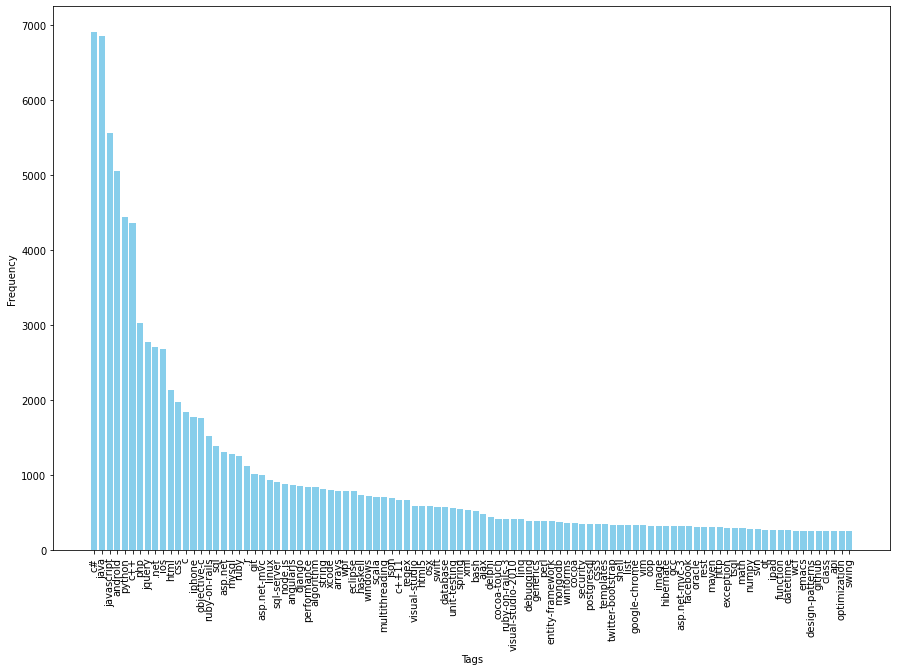

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.bar(labels, frequencies, color = 'skyblue')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

In [40]:
joined_df.head(3)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]"
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]"
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]"


In [41]:
def delete_uncommon_tags(tags):
    tags_remain = []
    for i in range(len(tags)):
        if tags[i] in tags_kept:
            tags_remain.append(tags[i])
    return tags_remain

In [42]:
joined_df['Tags'] = joined_df['Tags'].apply(lambda x: delete_uncommon_tags(x))
joined_df['Tags'] = joined_df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [43]:
joined_df = joined_df.reset_index()

In [44]:
joined_df.dropna(subset = ['Tags'], inplace=True)
joined_df.drop(columns = ['index', 'Id', 'Score'], inplace=True)

In [45]:
joined_df.shape

(63167, 3)

In [46]:
import nltk

token = nltk.tokenize.ToktokTokenizer()
words = token.tokenize(joined_df['Body'][2])

In [47]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    clean_text = text.lower()
    clean_text = BeautifulSoup(clean_text, 'html.parser').get_text()

    clean_text = re.sub(r'\s+', ' ', clean_text)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    return clean_text.strip()

In [63]:
cleaned_df = joined_df
cleaned_df['Title'] = cleaned_df['Title'].apply(lambda x: clean_text(x))
cleaned_df['Body'] = cleaned_df['Body'].apply(lambda x: clean_text(x))

In [65]:
lemmatizer = nltk.WordNetLemmatizer()

def word_lemmatizer(text):
    text = text.split()
    lemmatized = []
    for word in text:
        x = lemmatizer.lemmatize(word, pos = 'v')
        lemmatized.append(x)
    
    return ' '.join(map(str, lemmatized))

# should be improved with position tags!!

def remove_stopwords(text):
    text = text.split()
    all_stopwords = set(nltk.corpus.stopwords.words("english"))
    cleaned = []
    
    for word in text:
        if word not in all_stopwords:
            cleaned.append(word)

    return ' '.join(map(str, cleaned))

In [66]:
cleaned_df['Title'] = cleaned_df['Title'].apply(lambda x: clean_text(x))
cleaned_df['Title'] = cleaned_df['Title'].apply(lambda x: word_lemmatizer(x))
cleaned_df['Title'] = cleaned_df['Title'].apply(lambda x: remove_stopwords(x))

In [67]:
cleaned_df['Body'] = cleaned_df['Body'].apply(lambda x: clean_text(x))
cleaned_df['Body'] = cleaned_df['Body'].apply(lambda x: word_lemmatizer(x))
cleaned_df['Body'] = cleaned_df['Body'].apply(lambda x: remove_stopwords(x))

In [125]:
#If you want to write pdf, better unlist the tag strings because there is some problem with loading
cleaned_df['Tags'] = cleaned_df['Tags'].apply(lambda tags: ' '.join(tags))
cleaned_df.to_csv('../Dataset/Cleaned_Dataset.csv', index = False, encoding = 'utf-8')

2.2 This section includes the creation of a baseline model. First is going to be used a classical NLP Method towards feature extraction and then a standard classifier that is goint to be trained and evaluated on top of the extracted features.

In [3]:
import pandas as pd
#when loading the dataframe, put the tags again on a list of strings
cleaned_df = pd.read_csv('../Dataset/Cleaned_Dataset.csv', encoding = 'utf-8')
cleaned_df['Tags'] = cleaned_df['Tags'].apply(lambda tag: tag.split())

In [5]:
#make sure that we still have 100 distinct tags and the dataframe was loaded correctly
all_tags = []

for tag_list in cleaned_df['Tags']:
    for tag in tag_list:
        all_tags.append(tag)

print(len(set(all_tags)))

100


In [6]:
cleaned_df['Total'] = cleaned_df['Title'] + ' ' + cleaned_df['Body']
X = cleaned_df['Total'].astype(str)
Y = cleaned_df['Tags']

In [7]:
Y.head(3)

0             [svn]
1    [sql, asp.net]
2       [algorithm]
Name: Tags, dtype: object

In [8]:
X.head(3)

0    good branch merge tutorials tortoisesvn really...
1    aspnet site map anyone get experience create s...
2    function create color wheel something ive pseu...
Name: Total, dtype: object

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, token_pattern=r'(?u)\S\S+') #maybe leave it as default later on

X_tfidf = vectorizer.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(50533, 1000) (12634, 1000) (50533, 100) (12634, 100)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score, roc_auc_score, hamming_loss

logreg_classifier = LogisticRegression(max_iter=1000, random_state = 42)
classifier = OneVsRestClassifier(logreg_classifier)

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

jaccard = jaccard_score(Y_test, Y_pred, average = 'samples')
print("Jaccard Similarity Score: ", jaccard * 100)
roc_auc = roc_auc_score(Y_test, Y_pred, average = 'samples')
print("ROC-AUC Score: ", roc_auc * 100)
hamming_loss_val = hamming_loss(Y_test, Y_pred)
print("Hamming Loss: ", hamming_loss_val * 100)

Jaccard Similarity Score:  0.39991557173763914
ROC-AUC Score:  0.7138178201283213
Hamming Loss:  0.011098622763970238


In [22]:
#will maybe check on Random Forest also, takes a bit longer to run
#maybe also add F1-Score(average='weighted')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score, roc_auc_score, hamming_loss

for base_classifier in [LogisticRegression(max_iter=1000, random_state=42), MultinomialNB(), LinearSVC()]:
    print("Classifier: ", base_classifier)
    
    classifier = OneVsRestClassifier(base_classifier)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)

    jaccard = jaccard_score(Y_test, Y_pred, average = 'samples')
    print("Jaccard Similarity Score: ", jaccard * 100)
    roc_auc = roc_auc_score(Y_test, Y_pred, average = 'samples')
    print("ROC-AUC Score: ", roc_auc * 100)
    hamming_loss_val = hamming_loss(Y_test, Y_pred)
    print("Hamming Loss: ", hamming_loss_val * 100)
    print("\n")

Classifier:  LogisticRegression(max_iter=1000, random_state=42)
Jaccard Similarity Score:  39.991557173763916
ROC-AUC Score:  71.38178201283213
Hamming Loss:  1.1098622763970238



Classifier:  MultinomialNB()
Jaccard Similarity Score:  12.679146219196873
ROC-AUC Score:  56.741412094668675
Hamming Loss:  1.4457812252651576



Classifier:  LinearSVC()
Jaccard Similarity Score:  44.6092554482613
ROC-AUC Score:  73.93438208673385
Hamming Loss:  1.0656957416495172



